# GoBike System Data
## by Dawei Wang

## Preliminary Wrangling

> I've collected the data of Ford GoBike System in 2018. We will be looking at which factors are important in the total numnber of counts and the riding duration time.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

>Load all csv files by months, then concatenate them into one file for future use.

In [2]:
df = pd.read_csv('201801-fordgobike-tripdata.csv')
for i in range(2,13):
    df = pd.concat([df, pd.read_csv('2018{}-fordgobike-tripdata.csv'.format("%02d" %i))])

In [3]:
df.to_csv('2018-fordgobike-tripdata.csv', index=False)

>Load file and have a quick glance at the data.

In [7]:
df = pd.read_csv('2018-fordgobike-tripdata.csv')

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [31]:
df.shape

(1863721, 16)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


> Quick glance at the count of missing data.

In [23]:
na_counts = df.isnull().sum()
base_color = sb.color_palette()[0]

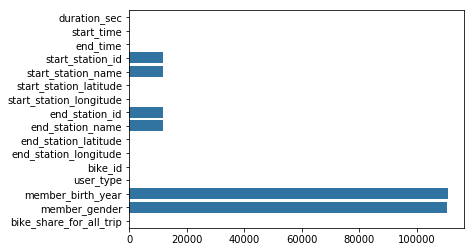

In [29]:
sb.barplot(na_counts,na_counts.index.values,  color=base_color);

Some data cleaning.

In [42]:
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

In [67]:
df = df.dropna()

In [93]:
df['member_birth_year'] = df.member_birth_year.astype('int')

In [527]:
df.shape

(1741556, 19)

### What is the structure of your dataset?

> There are 1741556 rows in the dataset. Most variables are numeric , three are categorical (user_type, member_gender, bike_share_for_all_trip)

### What is/are the main feature(s) of interest in your dataset?

> I am mostly interested in duration time and count of rides. The goal is to understand what factors are significant in affecting these two features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Possible factors are age, gender, user type, regions and bike share.

## Univariate Exploration

> I'll start with the number of rides at different months, weekdays and hours of a day.

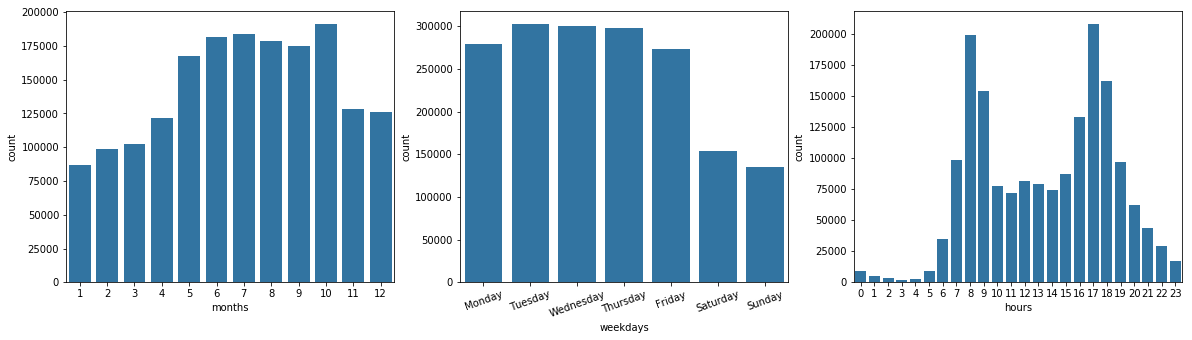

In [170]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sb.countplot(x=df.start_time.dt.month, color = base_color)
plt.xlabel('months');

plt.subplot(1,3,2)
ax=sb.countplot(x=df.start_time.dt.weekday, color=base_color);
plt.xlabel('weekdays');
plt.xticks(ax.get_xticks(),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=20);

plt.subplot(1,3,3)
sb.countplot(x=df.start_time.dt.hour, color=base_color);
plt.xlabel('hours');

> It can be seen that from May to October, the number of rides is significantly higher than other months. This might be because the weather is more suitable for riding a bike.

> More people ride bikes on weekdays than weekends. This is same as intuition. Here I changed the xticks since the default xticks are 0-6.

> The most number of rides is at 8:00 and 17:00. At commuting time, the number of ride is sigfinicantly higher than other times, which is what we expect. 

> Next, I will look at the three categorical variables: gender, bike share and user type.

In [242]:
gender = df.member_gender.value_counts()
share = df.bike_share_for_all_trip.value_counts()
user_type = df.user_type.value_counts()

Text(0.5,0,'user type')

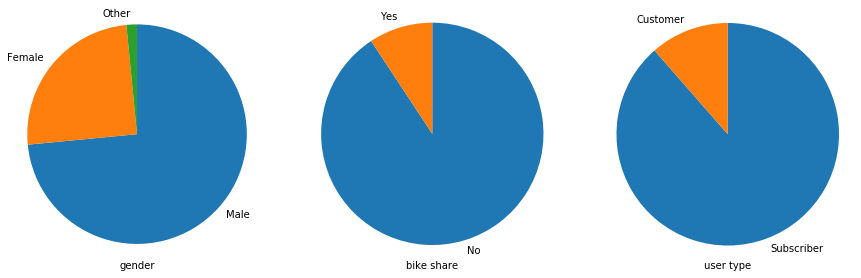

In [239]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
plt.pie(gender, labels=gender.index, startangle=90, counterclock=False);
plt.axis('square');
plt.xlabel('gender')

plt.subplot(1,3,2)
plt.pie(share, labels=share.index, startangle=90, counterclock=False);
plt.axis('square');
plt.xlabel('bike share')

plt.subplot(1,3,3)
plt.pie(user_type, labels=user_type.index, startangle=90, counterclock=False);
plt.axis('square');
plt.xlabel('user type')

> About 3 quaters users are Male.

> Most of users don't share the bike during their ride.

> Most of the users are subscriber.

> Next, I'll look at the distribution of duration.

Text(0.5,0,'duration in sec')

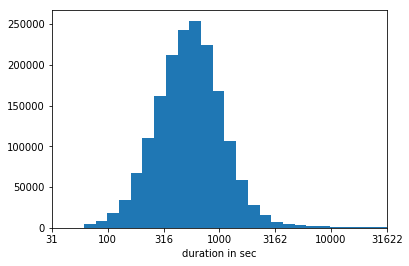

In [236]:
plt.hist(np.log10(df.duration_sec), bins=30);
plt.xlim(1.5,4.5)
loc, ticks = plt.xticks();
plt.xticks(loc, (10**loc).astype(int));
plt.xlabel('duration in sec')

> After scaling the duration by log, the distribution looks like a normal distribution. I rename the xticks so that it is easier to understand.

> Next, I will look at the age distribution of users.

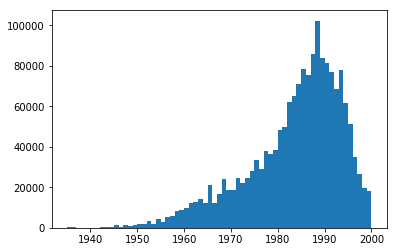

In [243]:
bins = np.arange(1935, 2001,1)
plt.hist(data=df, x='member_birth_year', bins=bins);

> Most of the users are born from 1980-2000, with ages 18-40. The mod is 1988, which corresponds to age 30.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration has a large range, so I applied the log scaling.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The duration has a log-normal distribution. I changed the start_date to datetime so that I can easily extract the months,  weekdays and hours.

## Bivariate Exploration

In [247]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No


> First, I will look at the relation between birth year and duration.

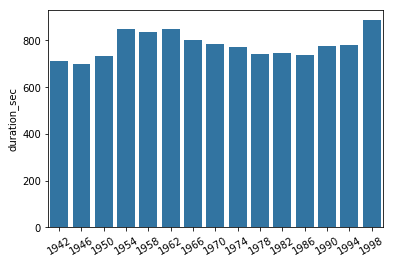

In [422]:
bin_size=4
xbin_edges = np.arange(1940, 2000+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df['member_birth_year'], xbin_edges, right=False, include_lowest=True)

y_means = df['duration_sec'].groupby(data_xbins).mean()

ax = sb.barplot(x=xbin_centers, y=y_means, color=base_color);
plt.xticks(ax.get_xticks(), xbin_centers.astype(int), rotation =30);

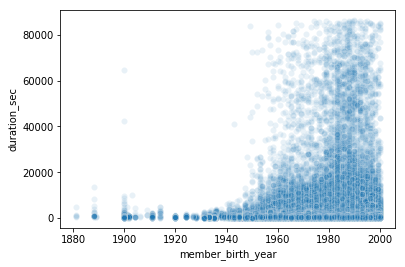

In [526]:
sb.scatterplot(data=df, x='member_birth_year',y='duration_sec', alpha=0.1);

> It can be seen that the range of duration at different ages isn't very wide. Young people (born after 1996) have a relatively longer riding duration, which is same as our expectation. It's a little surprising that eople born between 1952 and 1964 also have a relatively longer riding duration. By looking at the scatterplot, we may notice that more people than usual at this age have a very long ride, this may be because they simply ride for exercise, which may explain why the mean is higher. Meanwhile, since there are fewer data points at these ages, the mean may not reflect the truth.

> Next I will look at the relation between bike share and duration.

C:\Users\David\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


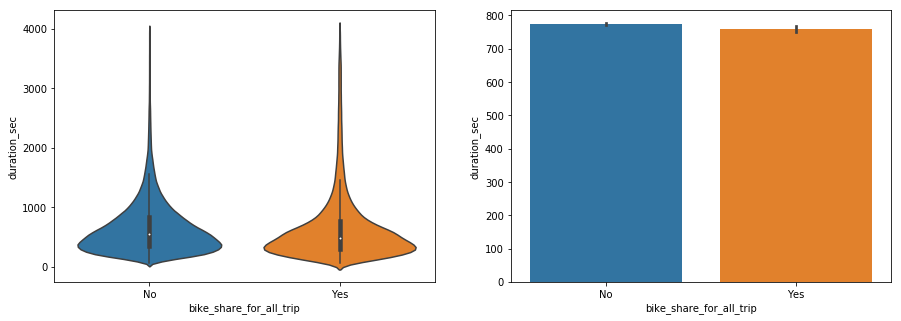

In [525]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sb.violinplot(data=df[df.duration_sec<4000], x='bike_share_for_all_trip', y='duration_sec');

plt.subplot(1,2,2)
sb.barplot(data=df, x='bike_share_for_all_trip', y='duration_sec');

> It doesn't seem that there is a significant different of duration on whether people share the bike or not. I would not consider this variable as an important factor.

> Next we look at the relation between user type and duration.

C:\Users\David\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


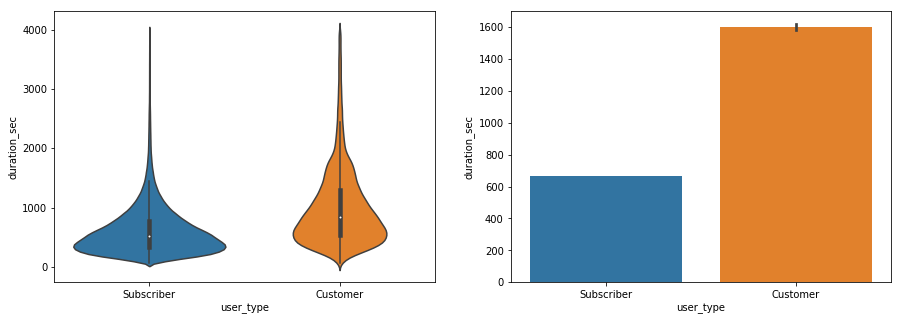

In [450]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sb.violinplot(data=df[df.duration_sec<4000], x='user_type', y='duration_sec');

plt.subplot(1,2,2)
sb.barplot(data=df, x='user_type', y='duration_sec');

> It's a little surprising that subscribers have lower duration time. Most subscribers have a relatively short fixed duration time, which is less than 1000 seconds, while the duration time for general customers is more scattered, with quite a few above 1000 seconds.

C:\Users\David\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


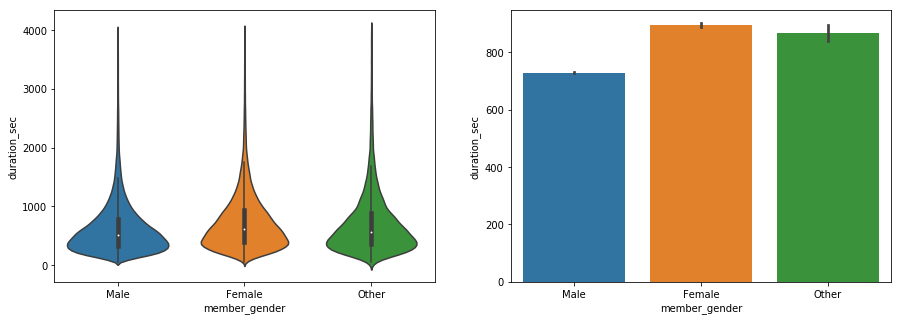

In [447]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sb.violinplot(data=df[df.duration_sec<4000], x='member_gender', y='duration_sec')

plt.subplot(1,2,2)
sb.barplot(data=df, x='member_gender', y='duration_sec')

> Male users have a relatively lower duration. The reason may be complicated, for example, one possible reason is that males rides faster. To confirm this, I will introduce the distance variable by comparing starting and ending latitude/longitude. For each latitude/longitude degree difference, the distance is roughply 69 miles.

In [455]:
df['distance_mi'] = (np.absolute(df['start_station_latitude']-df['end_station_latitude']) + np.absolute(df['start_station_longitude']-df['end_station_longitude']))*69
df['speed_mph'] = df['distance_mi']/df['duration_sec']*3600

> Now we have a quick glance at the distribution of distance.

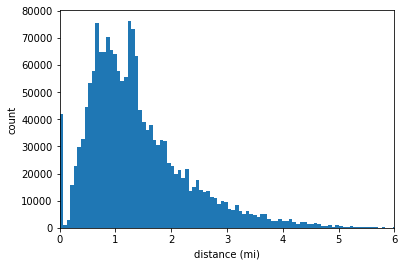

In [482]:
plt.xlim(0,6)
plt.hist(data=df, x='distance_mi', color = base_color, bins=1000);
plt.xlabel('distance (mi)');
plt.ylabel('count');

>There are two peaks in the distribution, one at about 0.8 mile and another one at about 1.3 miles. It's unusual that there are quite a few rides of 0 mile. No we have a close look at these data points.

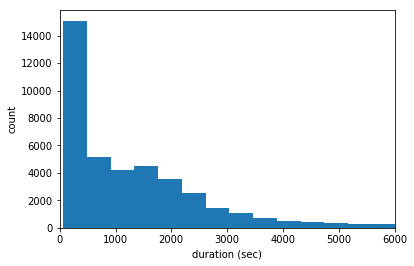

In [478]:
plt.xlim(0,6000)
plt.hist(data=df[df.distance_mi<0.1], x='duration_sec', color=base_color, bins=200);
plt.xlabel('duration (sec)');
plt.ylabel('count');

> It turns out that most of these rides also have 0 duration time. This means people give up riding right after activating. Nonzero duration time means these rides have the same starting and ending stations.

> It would be interesting to look at the relation between duration and distance.

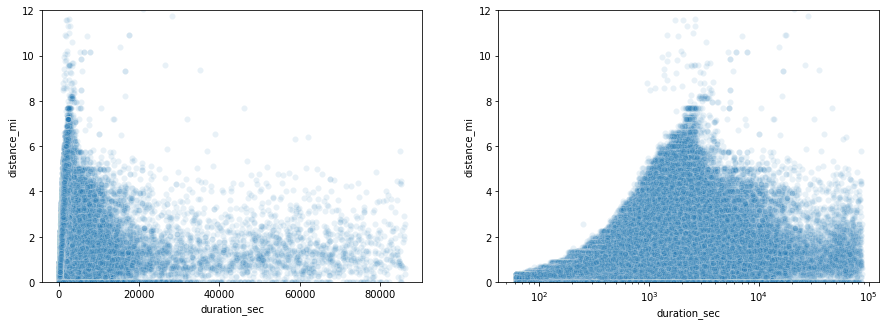

In [508]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sb.scatterplot(data=df, x='duration_sec', y='distance_mi', alpha=0.1);
plt.ylim(0,12);

plt.subplot(1,2,2)
sb.scatterplot(data=df, x='duration_sec', y='distance_mi', alpha=0.1);
plt.ylim(0,12);
plt.xscale('log');

> To my surprise, the relation between duration and distance is not linear. This might be bacause the distance variable is not the actual distance, it only describe the distance between starting station and ending station. There may be quite a few people who ride for a long distance and return to origin.

>Now we look at the speed among difference genders.

C:\Users\David\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


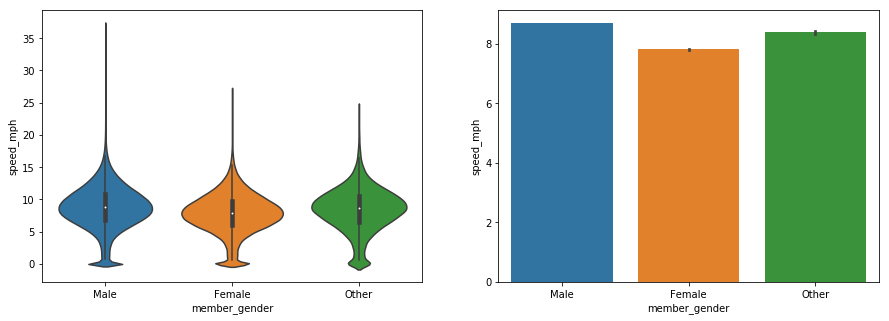

In [458]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sb.violinplot(data=df, x='member_gender', y='speed_mph');

plt.subplot(1,2,2)
sb.barplot(data=df, x='member_gender', y='speed_mph');

> We can comfirm our guess that male have faster speed than females. For genders other than male and female, since the data points are too few, we are not particularly interested.

> Now I will look at the relation between latitude and longitude.

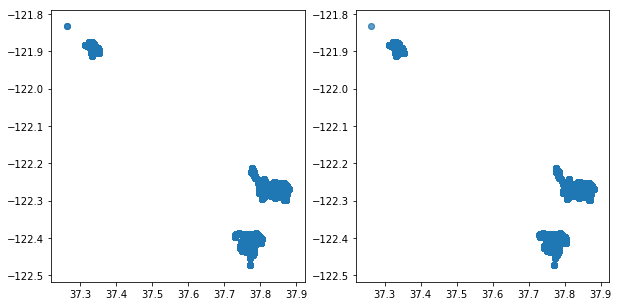

In [387]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.scatter(data=df, x='start_station_latitude', y='start_station_longitude', alpha=0.1);

plt.subplot(1,2,2)
plt.scatter(data=df, x='end_station_latitude', y='end_station_longitude', alpha=0.1);

> From the above figures, we can see that there are three regions. By looking at the data closely, it's not hard to confirm that these three regions are independent, i.e. the starting station and ending station of each ride are inside one region. Hence it's natural to create a new catogorical variable: regions. Notice that the longitude is enough to seperate the regions. We call the top region 'A', the center region 'B' and the bottom region 'C'.

In [436]:
df['regions']='B'
df.loc[df.start_station_longitude>-122, 'regions']='A'
df.loc[df.start_station_longitude<-122.35, 'regions']='C'
df.regions.value_counts(0)

C    1273866
B     384066
A      83624
Name: regions, dtype: int64

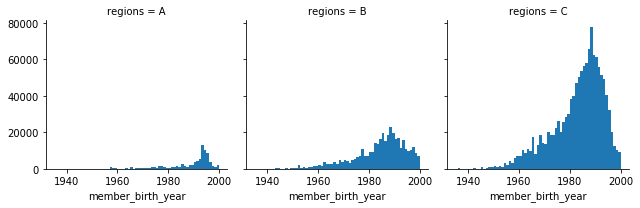

In [496]:
bins = np.arange(1935, 2001,1)
g=sb.FacetGrid(data=df, col='regions', col_order=['A','B','C']);
g.map(plt.hist, 'member_birth_year', bins=bins);

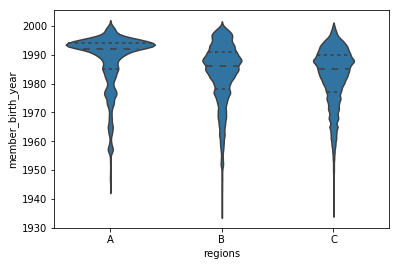

In [499]:
sb.violinplot(data=df[df.member_birth_year>1934], x='regions', y='member_birth_year', inner='quartile', color=base_color, order=['A','B','C']);

> It can be seen that region C has most users and region A has least users. In region A, the users are significantly younger, mostly below 20, while in region B and C, the age distributions are roughly the same.

> Next, we look at how the regions affect the duration time.

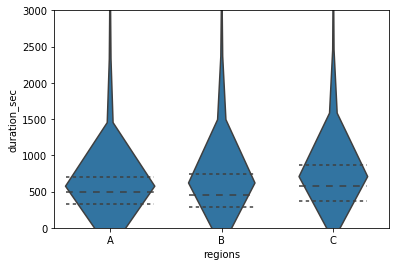

In [513]:
sb.violinplot(data=df, x='regions', y='duration_sec', color=base_color, inner='quartile', order=['A','B','C']);
plt.ylim(0,3000);

> The viloin is fatter in region A, which means more people here have a shorter ride. Region C has the longest riding duration time among three regions.

> Next we look at the gender, user type and bike share in different regions.

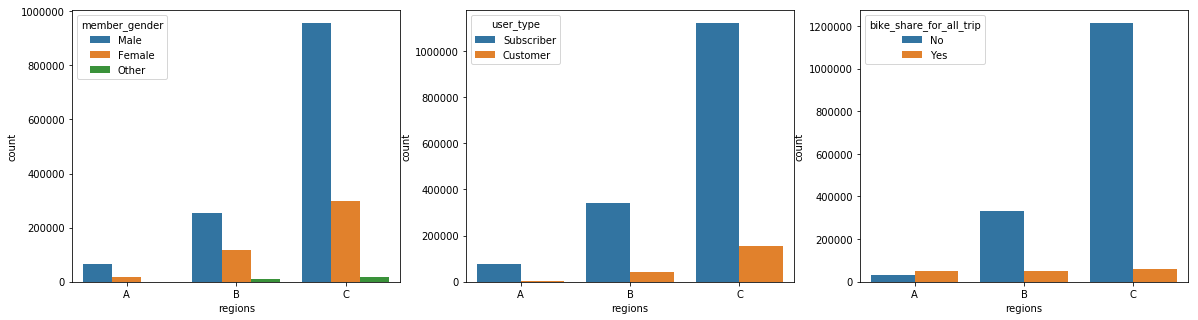

In [524]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sb.countplot(data=df, x='regions', hue='member_gender', order=['A','B','C']);

plt.subplot(1,3,2)
sb.countplot(data=df, x='regions', hue='user_type', order=['A','B','C']);

plt.subplot(1,3,3)
sb.countplot(data=df, x='regions', hue='bike_share_for_all_trip', order=['A','B','C']);

> The only interesting thing here is that the third figure shows that, in region A more people share the bike while in other regions, most people don't normally share a bike.

> Finally, we look at which category has most count of rides.

In [539]:
counts = df.groupby(['member_gender', 'user_type']).size()
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index='user_type', columns = 'member_gender', values = 'count')

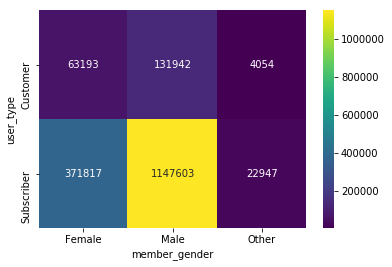

In [541]:
sb.heatmap(counts, annot=True, fmt='d', cmap='viridis');

> It turns out that male Subscribers have the most rides. This is consistent with our intuition. One worth noting is that femal subscriber is a lot more than male customer. We know there are more males than femals and there are more subscriber than customers, hence the user type factor dominates gender factor in the total counts.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is surprising that subscribers have lower duration time than other customers. It is also a little unexpected that males have shorter duration time than females, however, after introducing distance variable and speed variable, we find out that this is because males normally ride faster than females. We also notice that there are three regions and the region factor has a slight effect on duration time. We expect to see linear relation between duration time and distance, but it's not the case. This may be because that the distance variable is not the actual distance.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In different regions, the user ages varies greatly. User age in region A is significantly yourger than other two regions. In different region, the bike share factor is also very different.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\David\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


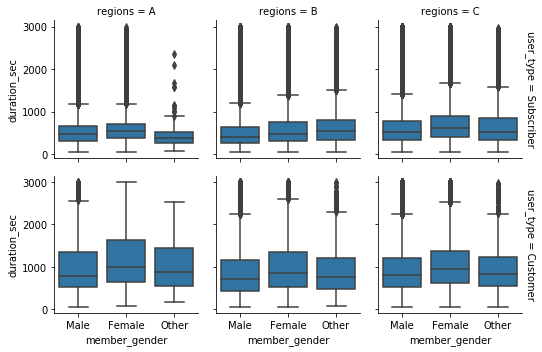

In [550]:
g=sb.FacetGrid(data=df[df.duration_sec<3000], row='user_type', col='regions', col_order = ['A','B','C'], margin_titles=True, size=2.5)
g.map(sb.boxplot, 'member_gender','duration_sec', order=['Male','Female','Other'])

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> In all cases, males spend less time than female on riding. However, the difference is very small for subscribers in region A. 

> In each region, the gender factor affects the duration time roughly the same, but customer have significant longer time than subscribers.

> For subscribers, region C seems to have longer duration time, while for customers, region A seems to have longer duration time.
### Were there any interesting or surprising interactions between features?

> Genders other than male and female normally have duration time shorter than female. The exception appears in region B for subscribers.